# Previsão de renda

### Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer entender os fatores que influenciam a renda dos clientes para melhorar a segmentação de produtos e identificar novas oportunidades de negócio.



Objetivo: Criar um modelo que ajude a instituição a prever a renda dos clientes com base em seus dados demográficos e comportamentais.

## Etapa 2 Crisp-DM: Entendimento dos dados

## Dicionário de Dados
| Variável                | Descrição                          | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência dos dados                                   | Data (object)|
| id_cliente              |  Identificação única do cliente                                 | Numérica|
| sexo                    |  Sexo do cliente (F = Feminino, M = Masculino)                          | Categórica|
| posse_de_veiculo        |  Cliente possui veículo (True = Sim, False = Não)                       | Booleana|
| posse_de_imovel         |  Cliente possui imóvel (True = Sim, False = Não)                       | Booleana|
| qtd_filhos              |  Quantidade de filhos do cliente                                 | Numérica|
| tipo_renda              |  Tipo de fonte de renda do cliente                                 | Categórica|
| educacao                |  Nível de educação do cliente                                 | Categórica|
| estado_civil            |  Estado civil do cliente                                 | Categórica|
| tipo_residencia         |  Tipo de residência do cliente                                 | Categórica|
| idade                   |  Idade do cliente em anos                                    | Numérica|
| tempo_emprego           |  Tempo de emprego em anos                                    | Numérica|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente                   | Numérica|
| renda                   |  Renda mensal do cliente em reais                                   | Numérica|

In [1]:
!pip install pandas-profiling
!pip install ydata-profiling
!pip install pydantic-settings
!pip install streamlit

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.1 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import streamlit as st

In [3]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.head(), renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

(   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
 0           0  2015-01-01       15056    F             False             True   
 1           1  2015-01-01        9968    M              True             True   
 2           2  2015-01-01        4312    F              True             True   
 3           3  2015-01-01       10639    F             False             True   
 4           4  2015-01-01        7064    M              True            False   
 
    qtd_filhos        tipo_renda           educacao estado_civil  \
 0           0        Empresário         Secundário     Solteiro   
 1           0       Assalariado  Superior completo       Casado   
 2           0        Empresário  Superior completo       Casado   
 3           1  Servidor público  Superior completo       Casado   
 4           0       Assalariado         Secundário     Solteiro   
 
   tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
 0            Casa   

#### Entendimento dos dados - Univariada e Bivariada

In [4]:
# Gerar o relatório
report = ProfileReport(renda, title="Relatório de Análise Exploratória", explorative=True)

# Exibir no Jupyter Notebook ou salvar como HTML
report.to_file("relatorio_analise_exploratoria.html")  # Salva em arquivo
report  # Abre no notebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Etapa 3 Crisp-DM: Preparação dos dados

In [5]:
# Seleção: Removendo colunas irrelevantes
renda = renda.drop(columns=['id_cliente'])

# Limpeza: Tratando dados ausentes em 'tempo_emprego'
renda['tempo_emprego'].fillna(renda['tempo_emprego'].median(), inplace=True)

# Verificando se todos os valores ausentes foram tratados
print(renda.isnull().sum())

# Construção: Criando novas variáveis
# Faixa Etária
bins = [0, 25, 40, 60, 100]
labels = ['Jovem', 'Adulto', 'Meia Idade', 'Idoso']
renda['faixa_etaria'] = pd.cut(renda['idade'], bins=bins, labels=labels, right=False)

# Renda por Pessoa
renda['renda_por_pessoa'] = renda['renda'] / renda['qt_pessoas_residencia']

# Formatação: Convertendo variáveis categóricas para 'category'
categorical_cols = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'faixa_etaria']
renda[categorical_cols] = renda[categorical_cols].astype('category')

# Verificando os tipos atualizados
print(renda.dtypes)

Unnamed: 0               0
data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64
Unnamed: 0                  int64
data_ref                   object
sexo                     category
posse_de_veiculo             bool
posse_de_imovel              bool
qtd_filhos                  int64
tipo_renda               category
educacao                 category
estado_civil             category
tipo_residencia          category
idade                       int64
tempo_emprego             float64
qt_pessoas_residencia     float64
renda                     float64
faixa_etaria             category
renda_por_pessoa          float64
dtype: object


<ipython-input-5-36c8a109cb36>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda['tempo_emprego'].fillna(renda['tempo_emprego'].median(), inplace=True)


## Etapa 4 Crisp-DM: Modelagem

<ipython-input-6-455dbfd79434>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MAE', data=metrics_df, palette='Blues_d')


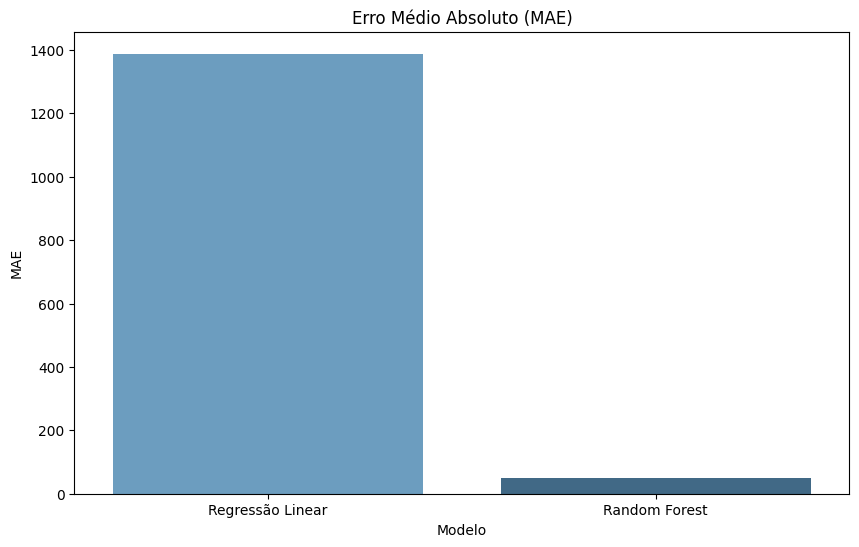

<ipython-input-6-455dbfd79434>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='RMSE', data=metrics_df, palette='Greens_d')


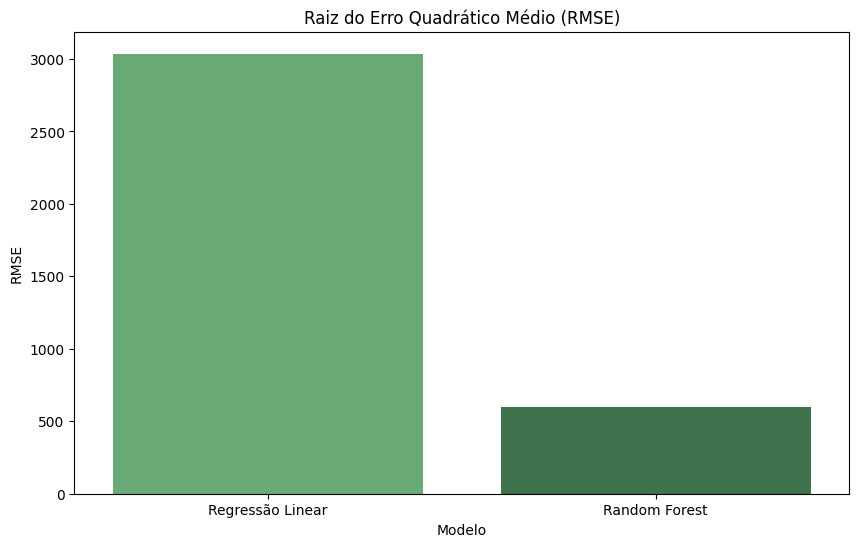

<ipython-input-6-455dbfd79434>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R²', data=metrics_df, palette='Oranges_d')


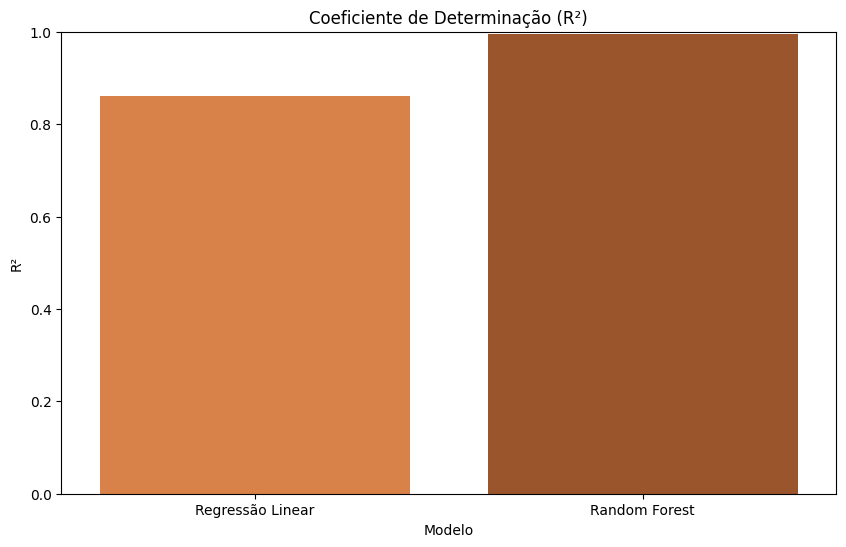

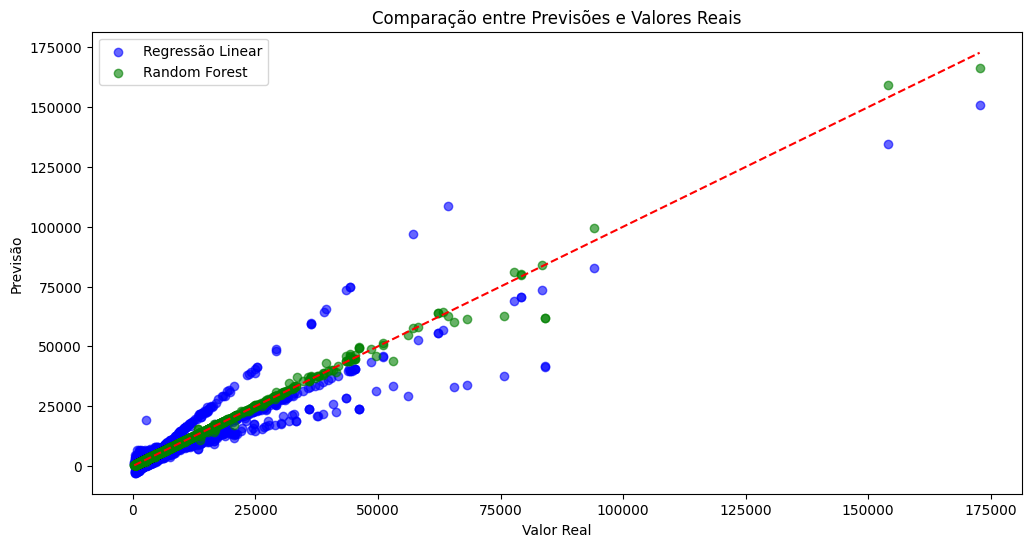

In [6]:
# 1. Preparando os dados para modelagem
X = renda.drop(columns=['renda'])
y = renda['renda']

# Codificando variáveis categóricas para numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modelos e Avaliação

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Métricas
metrics = {
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
    ],
}

# DataFrame para visualização
metrics_df = pd.DataFrame(metrics)

# Visualizando Métricas
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='MAE', data=metrics_df, palette='Blues_d')
plt.title('Erro Médio Absoluto (MAE)')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='RMSE', data=metrics_df, palette='Greens_d')
plt.title('Raiz do Erro Quadrático Médio (RMSE)')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='R²', data=metrics_df, palette='Oranges_d')
plt.title('Coeficiente de Determinação (R²)')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.show()

# 3. Comparação das Previsões
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Regressão Linear', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha ideal
plt.title('Comparação entre Previsões e Valores Reais')
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.legend()
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados

In [7]:
# Exibindo as métricas em uma tabela
print("Métricas dos Modelos:")
print(metrics_df)

# Seleção do melhor modelo
melhor_modelo = metrics_df.loc[metrics_df['R²'].idxmax(), 'Modelo']
print(f"\nMelhor modelo com base no R²: {melhor_modelo}")

Métricas dos Modelos:
             Modelo          MAE         RMSE        R²
0  Regressão Linear  1388.009567  3036.557747  0.859946
1     Random Forest    49.752107   596.106801  0.994603

Melhor modelo com base no R²: Random Forest


## Etapa 6 Crisp-DM: Implantação

In [ ]:
# Carregando os dados e treinar o modelo (esta parte seria feita antes)
renda = pd.read_csv('previsao_de_renda.csv')  # Seu dataset
X = renda.drop(columns=['renda'])
y = renda['renda']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Configurando o Streamlit
st.title("Previsão de Renda")
st.write("Preencha as informações abaixo para prever a renda de um cliente.")

# Campos do formulário
sexo = st.selectbox("Sexo", ["Feminino", "Masculino"])
idade = st.slider("Idade", 18, 100, 30)
educacao = st.selectbox("Nível de Educação", ["Ensino Médio", "Superior Completo", "Pós-graduação"])
estado_civil = st.selectbox("Estado Civil", ["Solteiro", "Casado", "Separado", "Viúvo"])
tipo_renda = st.selectbox("Tipo de Renda", ["Assalariado", "Empresário", "Pensionista", "Servidor Público"])
posse_de_veiculo = st.checkbox("Possui Veículo?")
posse_de_imovel = st.checkbox("Possui Imóvel?")
tempo_emprego = st.slider("Tempo de Emprego (anos)", 0, 40, 5)
qt_pessoas_residencia = st.slider("Quantidade de Pessoas na Residência", 1, 10, 2)

# Processando os dados do usuário
input_data = {
    'sexo': [sexo],
    'idade': [idade],
    'educacao': [educacao],
    'estado_civil': [estado_civil],
    'tipo_renda': [tipo_renda],
    'posse_de_veiculo': [posse_de_veiculo],
    'posse_de_imovel': [posse_de_imovel],
    'tempo_emprego': [tempo_emprego],
    'qt_pessoas_residencia': [qt_pessoas_residencia]
}
input_df = pd.DataFrame(input_data)

# Garantindo compatibilidade com o modelo
input_df = pd.get_dummies(input_df, drop_first=True)
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Prevendo a renda
if st.button("Prever Renda"):
    previsao = rf_model.predict(input_df)
    st.success(f"A renda prevista para o cliente é R$ {previsao[0]:,.2f}")

